Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0    1    3    4    5    7  accuracy  macro avg  weighted avg
precision  1.0  1.0  1.0  1.0  1.0  1.0       1.0        1.0           1.0
recall     1.0  1.0  1.0  1.0  1.0  1.0       1.0        1.0           1.0
f1-score   1.0  1.0  1.0  1.0  1.0  1.0       1.0        1.0           1.0
support    1.0  1.0  3.0  7.0  2.0  7.0       1.0       21.0          21.0
_______________________________________________
Confusion Matrix: 
 [[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 7 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 7]]

Test Result:
Accuracy Score: 77.78%
_______________________________________________
CLASSIFICATION REPORT:
             2     3    4    6    7  accuracy  macro avg  weighted avg
precision  0.0  0.60  1.0  0.0  1.0  0.777778       0.52      0.644444
recall     0.0  1.00  1.0  0.0  1.0  0.777778       0.60      0.777778
f1-score   0.0  0.75  1.0  0.0  1.0 

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


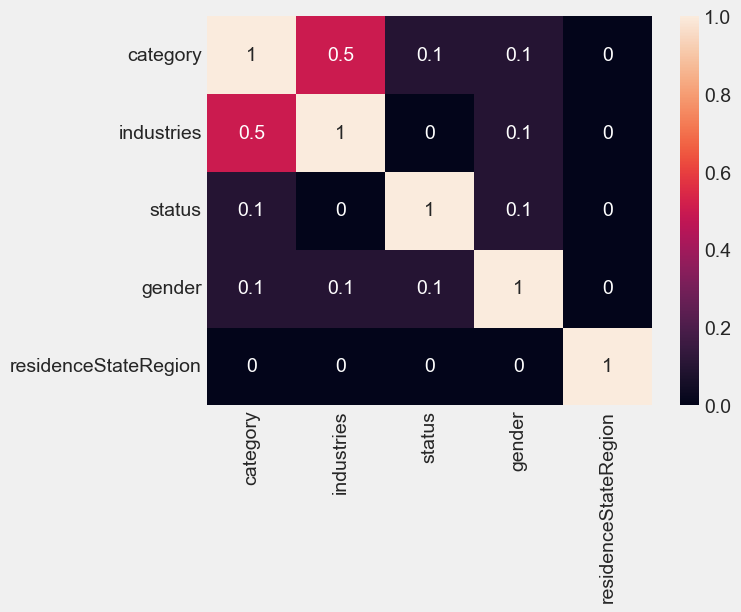

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'Дерево решений')

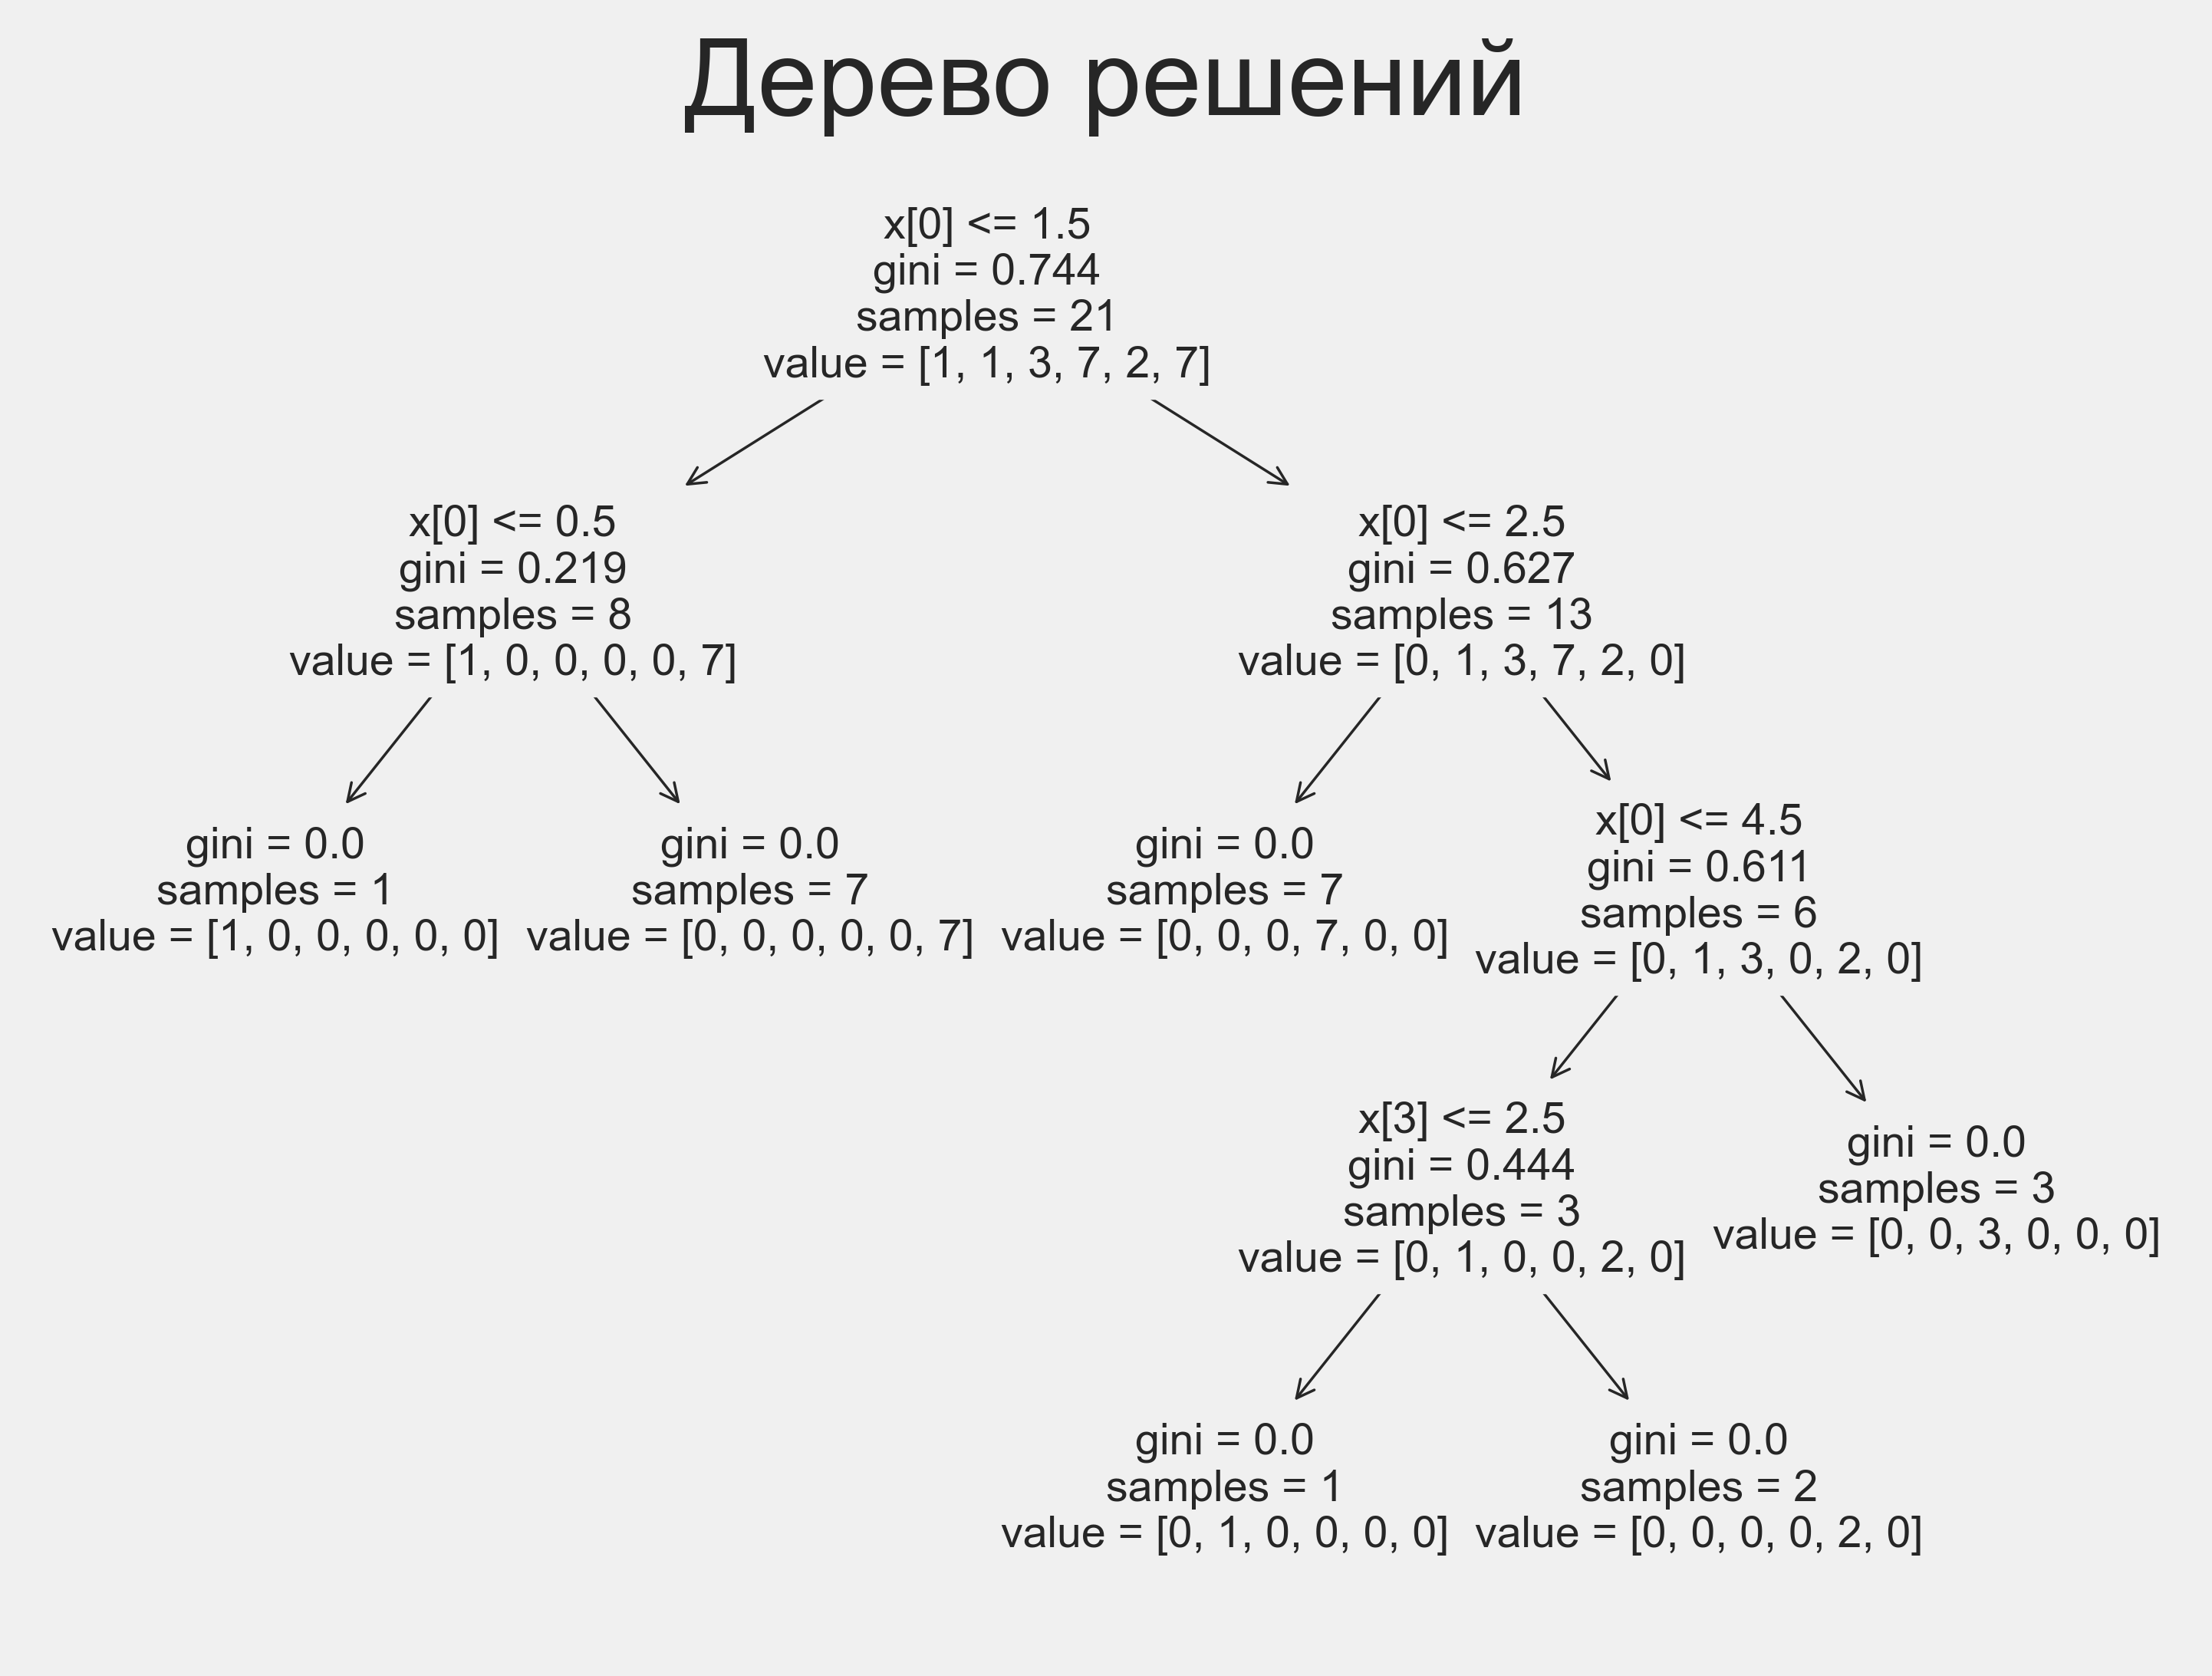

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

COLUMN = 'industries'

start_df = pd.read_csv("../lab2/Billionaires Statistics Dataset.csv")
start_df = start_df.head(100)
start_df.dropna(inplace=True)
start_df.reset_index(drop=True, inplace=True)
categorical_col = []
for column in start_df.columns:
    if start_df[column].dtype == 'object' and len(start_df[column].unique()) <= 10:
        categorical_col.append(column)

df = start_df[categorical_col].copy()
df[COLUMN] = df[COLUMN].astype("category").cat.codes

df = df.drop('country', axis=True)
df = df.drop('countryOfCitizenship', axis=True)
df = df.drop('gdp_country', axis=True)
df = df.drop('date', axis=True)

categorical_col.remove('country')
categorical_col.remove('countryOfCitizenship')
categorical_col.remove('gdp_country')
categorical_col.remove('date')

for column in df:
    if df[column].dtype == 'object':
        df[column] = pd.factorize(df[column])[0]
       
sns.heatmap(
    round(
        abs(df.corr()),
        1
    ),
    annot=True
)

categorical_col.remove(COLUMN)

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

X = df.drop(COLUMN, axis=1)
y = df[COLUMN]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train == False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

print("Shape of the dataset is: ", X.shape)
similarity_matrix = cosine_similarity(X)

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

plt.figure(figsize=(10, 8))
plt.show()

DPI = 500
plt.figure(dpi=DPI)
tree.plot_tree(model)
plt.title("Дерево решений")